
# Additive function

We introduce the variance-based Sobol indices using an elementary example. 
For more details, refer [1]_.

\begin{align}f(x) = a \cdot X_1 + b \cdot X_2, \quad X_1, X_2 \sim \mathcal{N}(0, 1), \quad a,b \in \mathbb{R}\end{align}

.. [1] Saltelli A, T. (2008). Global sensitivity analysis: The primer. John Wiley.


In [1]:
import numpy as np

from UQpy.run_model.RunModel import RunModel
from UQpy.run_model.model_execution.PythonModel import PythonModel
from UQpy.distributions import Normal
from UQpy.distributions.collection.JointIndependent import JointIndependent
from UQpy.sensitivity.SobolSensitivity import SobolSensitivity
from UQpy.sensitivity.PostProcess import *

np.random.seed(123)

**Define the model and input distributions**



In [2]:
# Create Model object
a, b = 1, 2

model = PythonModel(
    model_script="local_additive.py",
    model_object_name="evaluate",
    var_names=[
        "X_1",
        "X_2",
    ],
    delete_files=True,
    params=[a, b],
)

runmodel_obj = RunModel(model=model)

# Define distribution object
dist_object = JointIndependent([Normal(0, 1)] * 2)

**Compute Sobol indices**



In [3]:
SA = SobolSensitivity(runmodel_obj, dist_object)
SA.run(n_samples=50000)

**First order Sobol indices**

Expected first order Sobol indices:

$\mathrm{S}_1 = \frac{a^2 \cdot \mathbb{V}[X_1]}{a^2 \cdot \mathbb{V}[X_1] + b^2 \cdot \mathbb{V}[X_2]} = \frac{1^2 \cdot 1}{1^2 \cdot 1 + 2^2 \cdot 1} = 0.2$

$\mathrm{S}_2 = \frac{b^2 \cdot \mathbb{V}[X_2]}{a^2 \cdot \mathbb{V}[X_1] + b^2 \cdot \mathbb{V}[X_2]} = \frac{2^2 \cdot 1}{1^2 \cdot 1 + 2^2 \cdot 1} = 0.8$



In [4]:
SA.first_order_indices

array([[0.19403013],
       [0.80059683]])

**Plot the first and total order sensitivity indices**



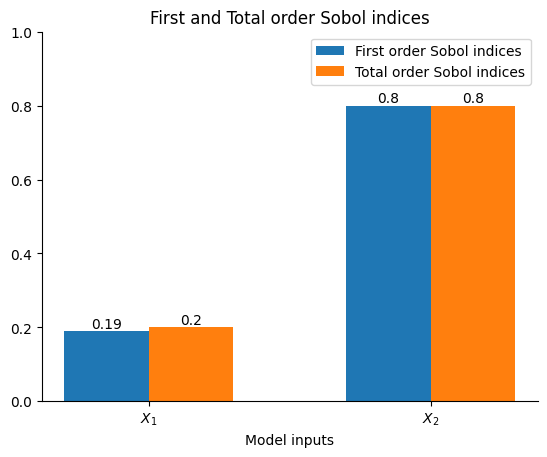

In [5]:
fig1, ax1 = plot_index_comparison(
    SA.first_order_indices[:, 0],
    SA.total_order_indices[:, 0],
    label_1="First order Sobol indices",
    label_2="Total order Sobol indices",
    plot_title="First and Total order Sobol indices",
)

In [7]:
import numpy as np

from UQpy.run_model.RunModel import RunModel
from UQpy.run_model.model_execution.PythonModel import PythonModel
from UQpy.distributions import Uniform
from UQpy.distributions.collection.JointIndependent import JointIndependent
from UQpy.sensitivity.SobolSensitivity import SobolSensitivity
from UQpy.sensitivity.PostProcess import *

np.random.seed(123)

# Create Model object
model = PythonModel(
    model_script="local_additive.py",
    model_object_name="evaluate_test",
    var_names=[
        "a",
        "b",
        "x",
    ],
    delete_files=True,
)

runmodel_obj = RunModel(model=model)

# Define distribution object
A = Uniform(-1, (0 - (-1)))
B = Uniform(-1, (0 - (-1)))
C = Uniform(-1, (1 - (-1)))
dist_object = JointIndependent([A, B, C])

SA = SobolSensitivity(runmodel_obj, dist_object)
SA.run(n_samples=5000)

In [8]:
SA.total_order_indices

array([[0.45813228],
       [0.15788494],
       [0.58358141]])

In [9]:
SA.first_order_indices

array([[ 0.44054069],
       [-0.02246064],
       [ 0.41481919]])